In [1]:
import numpy as np
from scipy.signal import convolve2d
from imageio import imread
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-b5e2d2b4ad6a>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
# read image from a url
taj_mahal = imread('https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/Taj_Mahal_%28Edited%29.jpeg/1024px-Taj_Mahal_%28Edited%29.jpeg')
# check size
print(taj_mahal.shape)

<ipython-input-2-2f66be30d4e6>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  taj_mahal = imread('https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/Taj_Mahal_%28Edited%29.jpeg/1024px-Taj_Mahal_%28Edited%29.jpeg')


(673, 1024, 3)


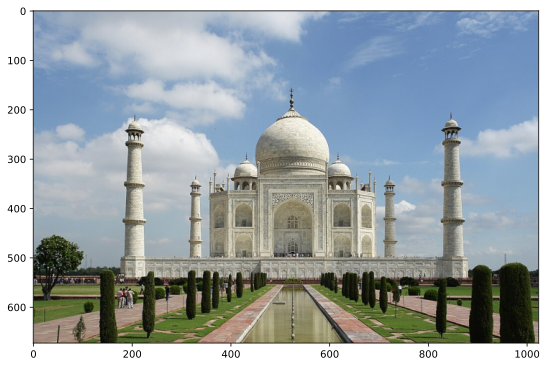

In [3]:
fig = plt.figure(figsize = (10,6))
plt.imshow(taj_mahal)

In [4]:
# transform the 3-channel image to a 2-channel image
taj_mahal = np.mean(taj_mahal, axis = 2)
taj_mahal = taj_mahal/ np.max(taj_mahal)
print(taj_mahal.shape)

(673, 1024)


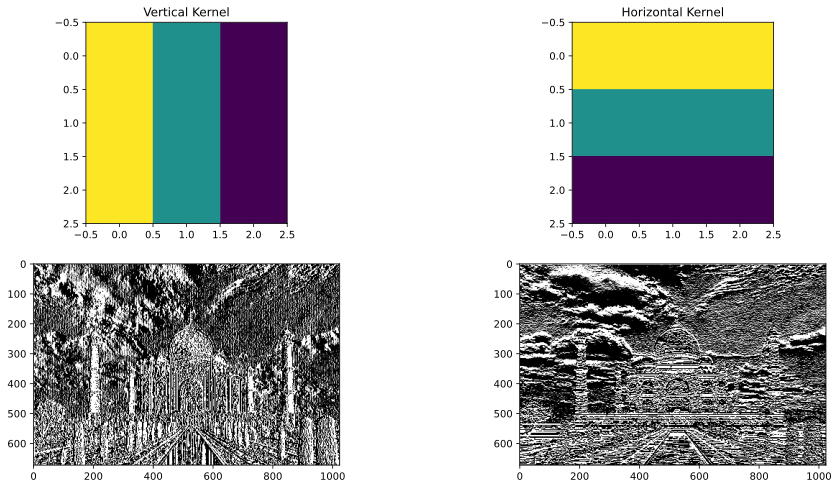

In [5]:
# hand craft the two convolution kernels
# Vertical Kernel
VK = np.array ([[1, 0, -1],
                [1, 0, -1],
                [1, 0, -1]])

# Horizontal Kernel
HK = np.array ([[1, 1, 1],
                [0, 0, 0],
                [-1,-1,-1]])

fig, ax = plt.subplots(2, 2, figsize = (16, 8))

ax[0,0].imshow(VK)
ax[0,0].set_title('Vertical Kernel')

ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal Kernel')

# To perform the convolution
convres = convolve2d(taj_mahal, VK, mode = 'same')
ax[1,0].imshow(convres, cmap = 'gray', vmin = 0, vmax = 0.01)
convres = convolve2d(taj_mahal, HK, mode ='same')
ax[1,1].imshow(convres, cmap = 'gray', vmin = 0, vmax = 0.01)
